## Project 3: Premium Insurance Analysis
### SDS 348
### 05/08/2021

In [1]:
# IMPORTANT
# Running this chunk lets you have multiple outputs from a single chunk; run it first!
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#importing libraries
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [2]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, \
    classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
warnings.simplefilter(action="ignore")

# Introduction:
- According to the United State Health Insurance Dataset,  The objectives of this dataset are insurance preimum customers based on their background condition such as age, sex, bmi, smoke status, region, to indicate the charges. The Insurance premium is the amount that insurer pay regularly to keep the policy in force. The bottom line of this study help the insurer know the outcome condition of premium insurance, then they can minimize the overcharge of insurance cost. 
 


In [3]:
# import insurance dataset
insur = pd.read_csv("../trinhpham/insurance.csv")

# Exploratory Data Analysis

In [4]:
import pandas as pd
# Take a peek at the dataset
insur.head()
insur.tail()
insur = insur.dropna()
insur.isnull().any()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

* There are no missing value in the DataFrame.

In [5]:
#information of insurance dataset
insur.info()
# total number of row and column
insur.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


(1338, 7)

* We observed that age, bmi, children, charges are numerical variable and sex, smoker, region  are categorical variables.

In [6]:
# summary statistic dataset
insur.describe()
insur.median()
IQR_age= (51-27)
print(IQR_age)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

24


In [7]:

# Target variable categorical
insur.sex.unique()

array(['female', 'male'], dtype=object)

In [8]:
insur.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

# Data Visualization

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

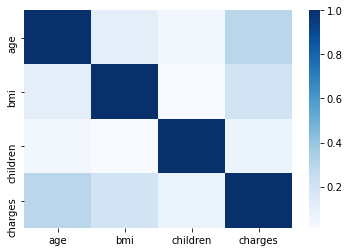

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(insur.corr(),cmap='Blues',annot=False)

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

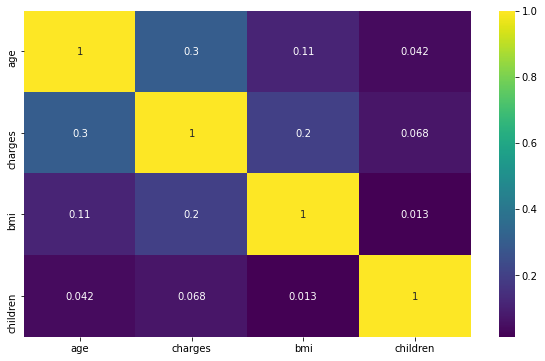

In [10]:
# Sex correlation matrix
k = 9 #number of variables for heatmap
cols = insur.corr().nlargest(k, 'age')['age'].index
cm = insur[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

* Charges and children variables are the strongest correlation to each others. 

<AxesSubplot:>

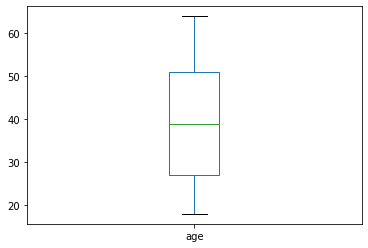

In [11]:
# Create a boxplot
insur['age'].plot(kind = "box")

* The boxplot shown the Age of insured approximately follow the uniform distribution with median is 39 years and mean is 39.2 years. The minimum age is 18 years  oldand the highest age is 64 years old. The interquartile of age is 24 percentage. There are no ouliter value in the Age Distribution. 

<AxesSubplot:xlabel='smoker', ylabel='count'>

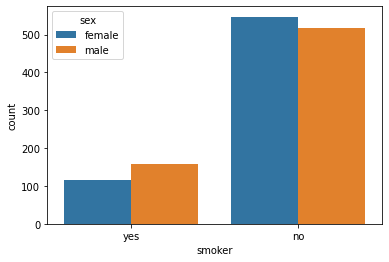

In [12]:
# Observation the categorical variable : smoker based on sex
sns.countplot(x = 'smoker', hue = 'sex', data = insur)

(-1.1018718496698334,
 1.1000891356985636,
 -1.1027154146109623,
 1.1011093550812814)

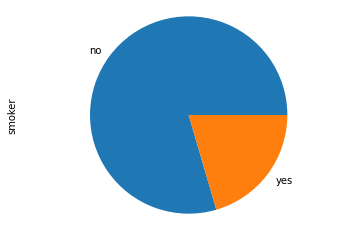

In [13]:
# Create a pie chart to display proportions
insur['smoker'].value_counts() \
.plot(kind = "pie") \
.axis('equal') # equal aspect ratio


age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

<AxesSubplot:xlabel='smoker', ylabel='charges'>

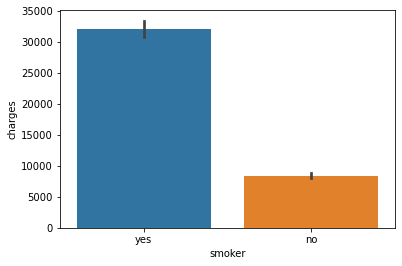

In [14]:
# Difference in charge between smoker and non smoker.
insur.groupby(['smoker','sex']).agg('count')

sns.barplot(x = "smoker", y = "charges", data = insur)

* The charge for smokers are significantly higher than non smoker. 